In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
!gdown https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv

Downloading...
From: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv
To: /content/netflix.csv
100% 3.40M/3.40M [00:00<00:00, 193MB/s]


In [ ]:
data= pd.read_csv("netflix.csv")

In [ ]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
data1=data.copy()

#2. Observations on the shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), missing value detection, statistical summary

**2.A Shape of Data**

In [ ]:
data1.shape

(8807, 12)

**2.B Data type of all attributes**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
data1=data1.assign(cast=data1['cast'].str.split(',')).explode('cast')

In [ ]:
data1

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Gail Mabalane,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Thabang Molaba,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
...,...,...,...,...,...,...,...,...,...,...,...,...
8806,s8807,Movie,Zubaan,Mozez Singh,Manish Chaudhary,India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
8806,s8807,Movie,Zubaan,Mozez Singh,Meghna Malik,India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
8806,s8807,Movie,Zubaan,Mozez Singh,Malkeet Rauni,India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
8806,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [ ]:

data1=data1.assign(listed_in=data1['listed_in'].str.split(',')).explode('listed_in')

In [ ]:
data1

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
...,...,...,...,...,...,...,...,...,...,...,...,...
8806,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,"March 2, 2019",2015,TV-14,111 min,International Movies,A scrappy but poor boy worms his way into a ty...
8806,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,"March 2, 2019",2015,TV-14,111 min,Music & Musicals,A scrappy but poor boy worms his way into a ty...
8806,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,"March 2, 2019",2015,TV-14,111 min,Dramas,A scrappy but poor boy worms his way into a ty...
8806,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,"March 2, 2019",2015,TV-14,111 min,International Movies,A scrappy but poor boy worms his way into a ty...


In [ ]:
data1=data1.assign(director=data1['director'].str.split(',')).explode('director')

In [ ]:
data1

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
...,...,...,...,...,...,...,...,...,...,...,...,...
8806,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,"March 2, 2019",2015,TV-14,111 min,International Movies,A scrappy but poor boy worms his way into a ty...
8806,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,"March 2, 2019",2015,TV-14,111 min,Music & Musicals,A scrappy but poor boy worms his way into a ty...
8806,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,"March 2, 2019",2015,TV-14,111 min,Dramas,A scrappy but poor boy worms his way into a ty...
8806,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,"March 2, 2019",2015,TV-14,111 min,International Movies,A scrappy but poor boy worms his way into a ty...


In [ ]:
data1=data1.assign(country=data1['country'].str.split(',')).explode('country')

In [ ]:
data1

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
...,...,...,...,...,...,...,...,...,...,...,...,...
8806,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,"March 2, 2019",2015,TV-14,111 min,International Movies,A scrappy but poor boy worms his way into a ty...
8806,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,"March 2, 2019",2015,TV-14,111 min,Music & Musicals,A scrappy but poor boy worms his way into a ty...
8806,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,"March 2, 2019",2015,TV-14,111 min,Dramas,A scrappy but poor boy worms his way into a ty...
8806,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,"March 2, 2019",2015,TV-14,111 min,International Movies,A scrappy but poor boy worms his way into a ty...


In [ ]:
data1=data1.drop(['description'],axis=1)

In [ ]:
data1['cast'].unique()

array([nan, 'Ama Qamata', ' Khosi Ngema', ..., ' Malkeet Rauni',
       ' Anita Shabdish', ' Chittaranjan Tripathy'], dtype=object)

In [ ]:
data1['director'].unique()

array(['Kirsten Johnson', nan, 'Julien Leclercq', ..., 'Majid Al Ansari',
       'Peter Hewitt', 'Mozez Singh'], dtype=object)

In [ ]:
data1['country'].unique()

array(['United States', 'South Africa', nan, 'India', ' Ghana',
       ' Burkina Faso', ' United Kingdom', ' Germany', ' Ethiopia',
       'United Kingdom', 'Germany', ' Czech Republic', 'Mexico', 'Turkey',
       'Australia', ' India', ' France', 'Finland', 'China', ' Canada',
       ' United States', ' Japan', 'Nigeria', 'Japan', 'Spain', 'France',
       'Belgium', 'South Korea', ' Singapore', ' Australia', ' Mexico',
       ' Italy', ' Romania', 'Argentina', ' Venezuela', ' Hong Kong',
       'Russia', 'Canada', 'Hong Kong', ' China', 'Italy', '',
       ' South Korea', 'Ireland', ' Nepal', 'New Zealand', ' Brazil',
       ' Greece', 'Jordan', 'Colombia', 'Switzerland', 'Israel', 'Brazil',
       ' Spain', 'Taiwan', ' Nigeria', 'Bulgaria', ' Algeria', 'Poland',
       ' Israel', 'Saudi Arabia', 'Thailand', 'Indonesia', 'Egypt',
       ' Denmark', ' Switzerland', 'Kuwait', ' Netherlands', ' Belgium',
       'Malaysia', ' New Zealand', 'Vietnam', ' Hungary', 'Sweden',
       'Lebanon

In [ ]:
data['director'].to_list()

['Kirsten Johnson',
 nan,
 'Julien Leclercq',
 nan,
 nan,
 'Mike Flanagan',
 'Robert Cullen, José Luis Ucha',
 'Haile Gerima',
 'Andy Devonshire',
 'Theodore Melfi',
 nan,
 'Kongkiat Komesiri',
 'Christian Schwochow',
 'Bruno Garotti',
 nan,
 nan,
 'Pedro de Echave García, Pablo Azorín Williams',
 nan,
 'Adam Salky',
 nan,
 'Olivier Megaton',
 nan,
 'K.S. Ravikumar',
 'Alex Woo, Stanley Moore',
 'S. Shankar',
 nan,
 'Rajiv Menon',
 'Dennis Dugan',
 'Scott Stewart',
 'Robert Luketic',
 'Ashwiny Iyer Tiwari, Abhishek Chaubey, Saket Chaudhary',
 nan,
 nan,
 nan,
 nan,
 'Daniel Sandu',
 'Cédric Jimenez',
 nan,
 'George Nolfi',
 nan,
 nan,
 'Steven Spielberg',
 'Jeannot Szwarc',
 'Joe Alves',
 'Joseph Sargent',
 'Tyler Greco',
 'Daniel Espinosa',
 'Bunmi Ajakaiye',
 'Antoine Fuqua',
 nan,
 nan,
 'Toshiya Shinohara',
 'Toshiya Shinohara',
 'Toshiya Shinohara',
 'Toshiya Shinohara',
 nan,
 'Masahiko Murata',
 'Hajime Kamegaki',
 'Masahiko Murata',
 'Hajime Kamegaki',
 'Masahiko Murata',
 'Hir

In [ ]:
data['listed_in'].to_list()

['Documentaries',
 'International TV Shows, TV Dramas, TV Mysteries',
 'Crime TV Shows, International TV Shows, TV Action & Adventure',
 'Docuseries, Reality TV',
 'International TV Shows, Romantic TV Shows, TV Comedies',
 'TV Dramas, TV Horror, TV Mysteries',
 'Children & Family Movies',
 'Dramas, Independent Movies, International Movies',
 'British TV Shows, Reality TV',
 'Comedies, Dramas',
 'Crime TV Shows, Docuseries, International TV Shows',
 'Crime TV Shows, International TV Shows, TV Action & Adventure',
 'Dramas, International Movies',
 'Children & Family Movies, Comedies',
 'British TV Shows, Crime TV Shows, Docuseries',
 'TV Comedies, TV Dramas',
 'Documentaries, International Movies',
 'Crime TV Shows, Spanish-Language TV Shows, TV Dramas',
 'Thrillers',
 'International TV Shows, Spanish-Language TV Shows, TV Action & Adventure',
 'Crime TV Shows, Docuseries, International TV Shows',
 'International TV Shows, TV Action & Adventure, TV Dramas',
 'Comedies, International Movi

In [ ]:
data['cast'].to_list()

[nan,
 'Ama Qamata, Khosi Ngema, Gail Mabalane, Thabang Molaba, Dillon Windvogel, Natasha Thahane, Arno Greeff, Xolile Tshabalala, Getmore Sithole, Cindy Mahlangu, Ryle De Morny, Greteli Fincham, Sello Maake Ka-Ncube, Odwa Gwanya, Mekaila Mathys, Sandi Schultz, Duane Williams, Shamilla Miller, Patrick Mofokeng',
 'Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabiha Akkari, Sofia Lesaffre, Salim Kechiouche, Noureddine Farihi, Geert Van Rampelberg, Bakary Diombera',
 nan,
 'Mayur More, Jitendra Kumar, Ranjan Raj, Alam Khan, Ahsaas Channa, Revathi Pillai, Urvi Singh, Arun Kumar',
 'Kate Siegel, Zach Gilford, Hamish Linklater, Henry Thomas, Kristin Lehman, Samantha Sloyan, Igby Rigney, Rahul Kohli, Annarah Cymone, Annabeth Gish, Alex Essoe, Rahul Abburi, Matt Biedel, Michael Trucco, Crystal Balint, Louis Oliver',
 'Vanessa Hudgens, Kimiko Glenn, James Marsden, Sofia Carson, Liza Koshy, Ken Jeong, Elizabeth Perkins, Jane Krakowski, Michael McKean, Phil LaMarr',
 'Kofi Ghanaba, Oyafunmike Ogunl

**2.C Conversion of categorical attributes to 'category' (If required)**

In [ ]:
data1['date_added']=pd.to_datetime(data1['date_added'])

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202065 entries, 0 to 8806
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   show_id       202065 non-null  object        
 1   type          202065 non-null  object        
 2   title         202065 non-null  object        
 3   director      151422 non-null  object        
 4   cast          199916 non-null  object        
 5   country       190168 non-null  object        
 6   date_added    201907 non-null  datetime64[ns]
 7   release_year  202065 non-null  int64         
 8   rating        201998 non-null  object        
 9   duration      202062 non-null  object        
 10  listed_in     202065 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 18.5+ MB


**2.D Missing Value Detection**

In [ ]:
data1.isna().sum()

show_id             0
type                0
title               0
director        50643
cast             2149
country         11897
date_added        158
release_year        0
rating             67
duration            3
listed_in           0
dtype: int64

In [ ]:
data1.groupby(["type","director","country"])[["rating"]].agg(pd.Series.mode)

rating
type    director                  country              
Movie    Aaron Moorhead           United States   TV-MA
         Aaron Woolf               Venezuela      TV-14
                                  United States   TV-14
         Abbas Alibhai Burmawalla India           TV-14
         Abdullah Al Noor         Bangladesh      TV-MA
...                                                 ...
TV Show Vikramaditya Motwane       United States  TV-MA
                                  India           TV-MA
        Wouter Bouvijn            Belgium         TV-MA
        Yasuhiro Irie             Japan           TV-14
        Ziad Doueiri              France          TV-MA

[6967 rows x 1 columns]

In [ ]:
data1['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

In [ ]:
data1.dropna(subset=['date_added','rating','duration'],inplace=True)

In [ ]:
data1['country'].fillna('unkown country',inplace=True)

In [ ]:
data1['director'].fillna('unkown director',inplace=True)

In [ ]:
data1['cast'].fillna('unkown cast',inplace=True)

In [ ]:
data1.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201837 entries, 0 to 8806
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   show_id       201837 non-null  object        
 1   type          201837 non-null  object        
 2   title         201837 non-null  object        
 3   director      201837 non-null  object        
 4   cast          201837 non-null  object        
 5   country       201837 non-null  object        
 6   date_added    201837 non-null  datetime64[ns]
 7   release_year  201837 non-null  int64         
 8   rating        201837 non-null  object        
 9   duration      201837 non-null  object        
 10  listed_in     201837 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 18.5+ MB


**2.E Statistical summary**

In [ ]:
data1.describe(include=object)

,show_id,type,title,director,cast,country,rating,duration,listed_in
count,201837,201837,201837,201837,201837,201837,201837,201837,201837
unique,8790,2,8790,5119,39249,198,14,220,73
top,s7165,Movie,Kahlil Gibran's The Prophet,unkown director,unkown cast,United States,TV-MA,1 Season,International Movies
freq,700,145905,700,50425,2149,49781,73883,34977,27141


In [ ]:
data2=data1.copy()

#1.Defining Problem Statement and Analysing basic metrics

**1.A Find number of movies and number of shows in the given dataset**

In [ ]:
value=data1['type'].value_counts()
value

Movie      145905
TV Show     55932
Name: type, dtype: int64

**1.B Find the number of Movies Country wise**

In [ ]:
data1['country'].value_counts()

United States     49781
India             22139
unkown country    11894
United Kingdom     9706
 United States     9482
                  ...  
 Samoa                2
 Sri Lanka            2
 Kazakhstan           1
 Uganda               1
 Nicaragua            1
Name: country, Length: 198, dtype: int64

**1.C Find number of movies and TV shows released in year wise**


In [ ]:
data1['release_year'].value_counts()

2018    24440
2019    21931
2017    20513
2020    19697
2016    18460
        ...  
1947        8
1946        6
1942        6
1943        5
1925        1
Name: release_year, Length: 74, dtype: int64

**1.D Find the value counts of Genres**

In [ ]:
data1["listed_in"].value_counts()

 International Movies    27141
Dramas                   19650
Comedies                 13894
Action & Adventure       12216
 Dramas                  10149
                         ...  
 Stand-Up Comedy            24
Romantic Movies             20
TV Sci-Fi & Fantasy          7
LGBTQ Movies                 5
Sports Movies                3
Name: listed_in, Length: 73, dtype: int64

**1.E Find number of TV shows and movies released in year wise**

In [ ]:
data1.groupby(["release_year","type"])[["show_id"]].count()

show_id
release_year type            
1925         TV Show        1
1942         Movie          6
1943         Movie          5
1944         Movie         24
1945         Movie         12
...                       ...
2019         TV Show    10005
2020         Movie       9608
             TV Show    10089
2021         Movie       5427
             TV Show     6467

[119 rows x 1 columns]

#3. Non-Graphical Analysis: Value counts and unique attributes

In [ ]:
data1['show_id'].value_counts()

s7165    700
s6985    504
s7516    468
s2554    416
s5306    378
        ... 
s2680      1
s2687      1
s2690      1
s6816      1
s1         1
Name: show_id, Length: 8790, dtype: int64

In [ ]:
data1['show_id'].unique()

array(['s1', 's2', 's3', ..., 's8805', 's8806', 's8807'], dtype=object)

In [ ]:
data1['show_id'].value_counts()


s7165    700
s6985    504
s7516    468
s2554    416
s5306    378
        ... 
s2680      1
s2687      1
s2690      1
s6816      1
s1         1
Name: show_id, Length: 8790, dtype: int64

In [ ]:
data1['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

In [ ]:
data1['type'].value_counts()

Movie      145905
TV Show     55932
Name: type, dtype: int64

In [ ]:
data1['title'].unique()

array(['Dick Johnson Is Dead', 'Blood & Water', 'Ganglands', ...,
       'Zombieland', 'Zoom', 'Zubaan'], dtype=object)

In [ ]:
data1['title'].value_counts()

Kahlil Gibran's The Prophet             700
Holidays                                504
Movie 43                                468
The Eddy                                416
Narcos                                  378
                                       ... 
Maurício Meirelles: Generating Chaos      1
Chris D'Elia: No Pain                     1
Surviving R. Kelly: The Impact            1
Functional Fitness                        1
Dick Johnson Is Dead                      1
Name: title, Length: 8790, dtype: int64

In [ ]:
data1['show_id'].unique()

array(['s1', 's2', 's3', ..., 's8805', 's8806', 's8807'], dtype=object)

In [ ]:
data1['director'].value_counts()

unkown director        50425
Martin Scorsese          419
Youssef Chahine          409
Cathy Garcia-Molina      356
Steven Spielberg         355
                       ...  
Leslye Davis               1
 Freddie Waters            1
Dave Skinner               1
Alex Gibney                1
Kirsten Johnson            1
Name: director, Length: 5119, dtype: int64

In [ ]:
data1['director'].unique()

array(['Kirsten Johnson', 'unkown director', 'Julien Leclercq', ...,
       'Majid Al Ansari', 'Peter Hewitt', 'Mozez Singh'], dtype=object)

In [ ]:
data1['cast'].value_counts()

unkown cast          2149
 Alfred Molina        160
 Salma Hayek          130
 Frank Langella       128
 John Rhys-Davies     125
                     ... 
 Ann Magnuson           1
 Ian Buchanan           1
 Patrick Bauchau        1
Kelsy Abbott            1
Aaron Pedersen          1
Name: cast, Length: 39249, dtype: int64

In [ ]:
data1['cast'].unique()

array(['unkown cast', 'Ama Qamata', ' Khosi Ngema', ..., ' Malkeet Rauni',
       ' Anita Shabdish', ' Chittaranjan Tripathy'], dtype=object)

In [ ]:
data1['country'].value_counts()

United States     49781
India             22139
unkown country    11894
United Kingdom     9706
 United States     9482
                  ...  
 Samoa                2
 Sri Lanka            2
 Kazakhstan           1
 Uganda               1
 Nicaragua            1
Name: country, Length: 198, dtype: int64

In [ ]:
data1['country'].unique()

array(['United States', 'South Africa', 'unkown country', 'India',
       ' Ghana', ' Burkina Faso', ' United Kingdom', ' Germany',
       ' Ethiopia', 'United Kingdom', 'Germany', ' Czech Republic',
       'Mexico', 'Turkey', 'Australia', ' India', ' France', 'Finland',
       'China', ' Canada', ' United States', ' Japan', 'Nigeria', 'Japan',
       'Spain', 'France', 'Belgium', 'South Korea', ' Singapore',
       ' Australia', ' Mexico', ' Italy', ' Romania', 'Argentina',
       ' Venezuela', ' Hong Kong', 'Russia', 'Canada', 'Hong Kong',
       ' China', 'Italy', '', ' South Korea', 'Ireland', ' Nepal',
       'New Zealand', ' Brazil', ' Greece', 'Jordan', 'Colombia',
       'Switzerland', 'Israel', 'Brazil', ' Spain', 'Taiwan', ' Nigeria',
       'Bulgaria', ' Algeria', 'Poland', ' Israel', 'Saudi Arabia',
       'Thailand', 'Indonesia', 'Egypt', ' Denmark', ' Switzerland',
       'Kuwait', ' Netherlands', ' Belgium', 'Malaysia', ' New Zealand',
       'Vietnam', ' Hungary', 'Swed

In [ ]:
data1['date_added'].value_counts()

2020-01-01    3748
2019-11-01    2258
2021-07-01    2219
2017-10-01    1899
2021-09-01    1756
              ... 
2019-06-10       1
2017-01-24       1
2020-11-18       1
2017-01-23       1
2021-09-25       1
Name: date_added, Length: 1713, dtype: int64

In [ ]:
data1['date_added'].unique()

array(['2021-09-25T00:00:00.000000000', '2021-09-24T00:00:00.000000000',
       '2021-09-23T00:00:00.000000000', ...,
       '2018-12-06T00:00:00.000000000', '2016-03-09T00:00:00.000000000',
       '2020-01-11T00:00:00.000000000'], dtype='datetime64[ns]')

In [ ]:
data1['release_year'].value_counts()

2018    24440
2019    21931
2017    20513
2020    19697
2016    18460
        ...  
1947        8
1946        6
1942        6
1943        5
1925        1
Name: release_year, Length: 74, dtype: int64

In [ ]:
data1['release_year'].unique()

array([2020, 2021, 1993, 2018, 1996, 1998, 1997, 2010, 2013, 2017, 1975,
       1978, 1983, 1987, 2012, 2001, 2014, 2002, 2003, 2004, 2011, 2008,
       2009, 2007, 2005, 2006, 1994, 2015, 2019, 2016, 1982, 1989, 1990,
       1991, 1999, 1986, 1992, 1984, 1980, 1961, 2000, 1995, 1985, 1976,
       1959, 1988, 1981, 1972, 1964, 1945, 1954, 1979, 1958, 1956, 1963,
       1970, 1973, 1925, 1974, 1960, 1966, 1971, 1962, 1969, 1977, 1967,
       1968, 1965, 1946, 1942, 1955, 1944, 1947, 1943])

In [ ]:
data1['rating'].value_counts()

TV-MA       73883
TV-14       43885
R           25860
PG-13       16246
TV-PG       14913
PG          10919
TV-Y7        6294
TV-Y         3664
TV-G         2779
NR           1543
G            1530
NC-17         149
TV-Y7-FV       86
UR             86
Name: rating, dtype: int64

In [ ]:
data1['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

In [ ]:
data1['duration'].value_counts()

1 Season     34977
2 Seasons     9485
3 Seasons     5060
94 min        4343
106 min       4040
             ...  
3 min            4
5 min            3
11 min           2
8 min            2
9 min            2
Name: duration, Length: 220, dtype: int64

In [ ]:
data1['duration'].unique()

array(['90 min', '2 Seasons', '1 Season', '91 min', '125 min',
       '9 Seasons', '104 min', '127 min', '4 Seasons', '67 min', '94 min',
       '5 Seasons', '161 min', '61 min', '166 min', '147 min', '103 min',
       '97 min', '106 min', '111 min', '3 Seasons', '110 min', '105 min',
       '96 min', '124 min', '116 min', '98 min', '23 min', '115 min',
       '122 min', '99 min', '88 min', '100 min', '6 Seasons', '102 min',
       '93 min', '95 min', '85 min', '83 min', '113 min', '13 min',
       '182 min', '48 min', '145 min', '87 min', '92 min', '80 min',
       '117 min', '128 min', '119 min', '143 min', '114 min', '118 min',
       '108 min', '63 min', '121 min', '142 min', '154 min', '120 min',
       '82 min', '109 min', '101 min', '86 min', '229 min', '76 min',
       '89 min', '156 min', '112 min', '107 min', '129 min', '135 min',
       '136 min', '165 min', '150 min', '133 min', '70 min', '84 min',
       '140 min', '78 min', '7 Seasons', '64 min', '59 min', '139 min',
    

In [ ]:
data1['listed_in'].value_counts()

 International Movies    27141
Dramas                   19650
Comedies                 13894
Action & Adventure       12216
 Dramas                  10149
                         ...  
 Stand-Up Comedy            24
Romantic Movies             20
TV Sci-Fi & Fantasy          7
LGBTQ Movies                 5
Sports Movies                3
Name: listed_in, Length: 73, dtype: int64

In [ ]:
data1['listed_in'].unique()

array(['Documentaries', 'International TV Shows', ' TV Dramas',
       ' TV Mysteries', 'Crime TV Shows', ' International TV Shows',
       ' TV Action & Adventure', 'Docuseries', ' Reality TV',
       ' Romantic TV Shows', ' TV Comedies', 'TV Dramas', ' TV Horror',
       'Children & Family Movies', 'Dramas', ' Independent Movies',
       ' International Movies', 'British TV Shows', 'Comedies', ' Dramas',
       ' Docuseries', ' Comedies', ' Crime TV Shows', 'TV Comedies',
       ' Spanish-Language TV Shows', 'Thrillers', ' Romantic Movies',
       ' Music & Musicals', 'Horror Movies', ' Sci-Fi & Fantasy',
       ' TV Thrillers', "Kids' TV", ' Thrillers', 'Action & Adventure',
       ' TV Sci-Fi & Fantasy', ' Classic Movies', ' Horror Movies',
       ' Anime Features', 'Reality TV', ' Sports Movies', 'Anime Series',
       " Kids' TV", 'International Movies', ' Korean TV Shows',
       'Sci-Fi & Fantasy', ' Science & Nature TV', ' Teen TV Shows',
       ' Cult Movies', 'Classic Movies

#4 Visual Analysis - Univariate, Bivariate after pre-processing of the data

In [ ]:
data1.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,unkown cast,United States,2021-09-25,2020,PG-13,90 min,Documentaries
1,s2,TV Show,Blood & Water,unkown director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows
1,s2,TV Show,Blood & Water,unkown director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Dramas
1,s2,TV Show,Blood & Water,unkown director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Mysteries
1,s2,TV Show,Blood & Water,unkown director,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows


# 4.1 For continuous variable(s): Distplot, countplot, histogram for univariate analysis

In [ ]:
def calc(x):
  y= x.split()[0]
  return y


In [ ]:
data1.insert(10,"Timings", data1["duration"].apply(calc))

In [ ]:
def calc(x):
  y= x.split()[1]
  return y


In [ ]:
data1.insert(11,"Readings", data1["duration"].apply(calc))

In [ ]:
data1["Month_added"]= data1["date_added"].dt.month

In [ ]:
data1.drop(columns="Month_added",inplace=True)

In [ ]:
data1["NF_release_year"]= data1["date_added"].dt.year

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


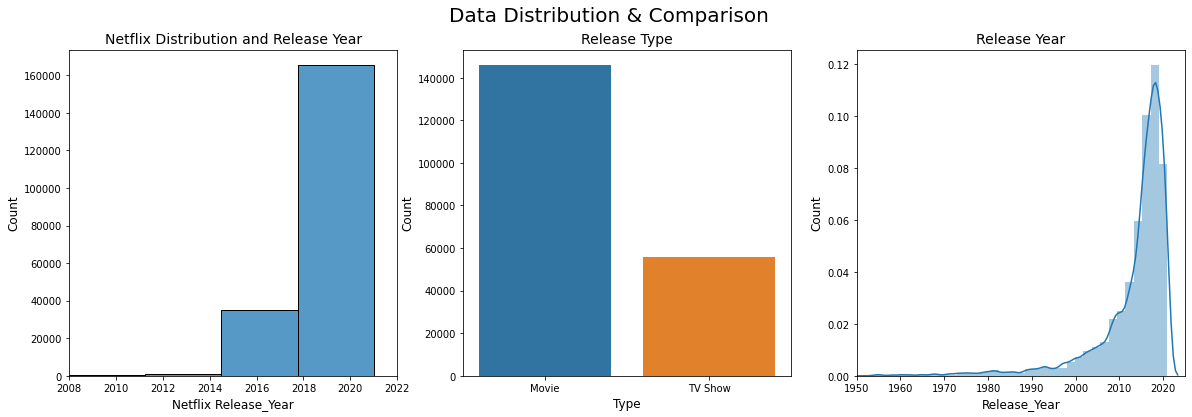

In [ ]:
plt.figure(figsize=(20,6))

plt.subplot(1, 3, 1)
sns.histplot(data1["NF_release_year"],bins=4)
plt.xlim(2008,2022)
plt.xlabel("Netflix Release_Year",fontsize=12)
plt.ylabel("Count",fontsize=12)
plt.title("Netflix Distribution and Release Year",fontsize=14)

plt.subplot(1, 3, 2)
sns.countplot(data=data1,x="type")
plt.xlabel("Type",fontsize=12)
plt.ylabel("Count",fontsize=12)
plt.title("Release Type",fontsize=14)

plt.subplot(1, 3, 3)
sns.distplot(data1["release_year"])
plt.xlim(1950,2025)
plt.xlabel("Release_Year",fontsize=12)
plt.ylabel("Count",fontsize=12)
plt.title("Release Year",fontsize=14)



plt.suptitle("Data Distribution & Comparison",fontsize=20)
plt.show()



In [ ]:
data1["Timings"]= data1["Timings"].astype("int")

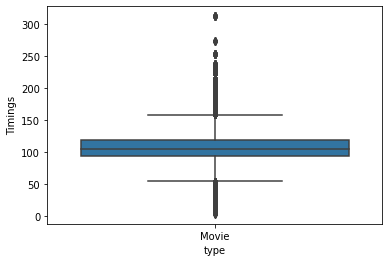

In [ ]:
sns.boxplot(data=data1[data1["type"]=="Movie"],x="type",y="Timings")


#4.2 For categorical variable(s)

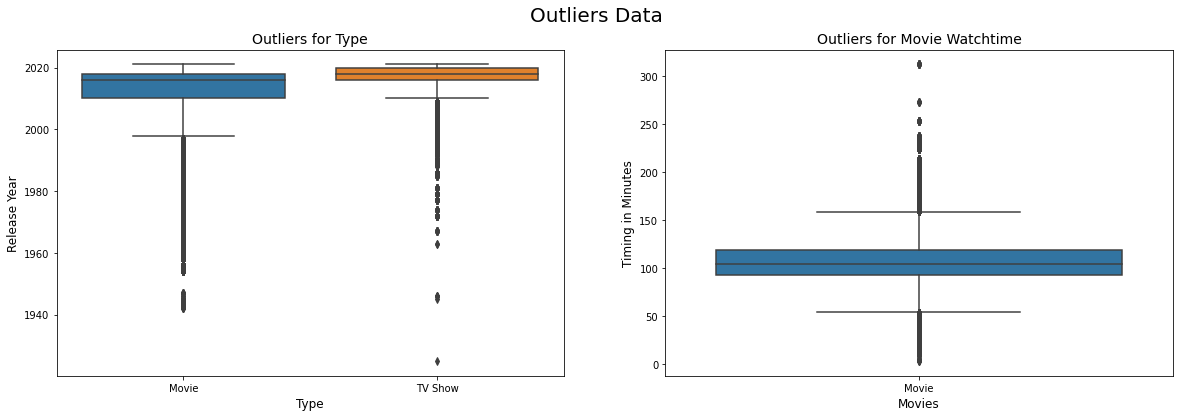

In [ ]:
plt.figure(figsize=(20,6))

plt.subplot(1, 2, 1)

sns.boxplot(data=data1, x="type",y="release_year")
plt.xlabel("Type",fontsize=12)
plt.ylabel("Release Year",fontsize=12)
plt.title("Outliers for Type",fontsize=14)

plt.subplot(1, 2, 2)
sns.boxplot(data=data1[data1["type"]=="Movie"],x="type",y="Timings")
plt.xlabel("Movies",fontsize=12)
plt.ylabel("Timing in Minutes",fontsize=12)
plt.title("Outliers for Movie Watchtime",fontsize=14)

plt.suptitle("Outliers Data",fontsize=20)
plt.show()

#4.3 For correlation: Heatmaps, Pairplots

In [ ]:
data1.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,Timings,Readings,listed_in,NF_release_year
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,unkown cast,United States,2021-09-25,2020,PG-13,90 min,90,min,Documentaries,2021
1,s2,TV Show,Blood & Water,unkown director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,2,Seasons,International TV Shows,2021
1,s2,TV Show,Blood & Water,unkown director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,2,Seasons,TV Dramas,2021
1,s2,TV Show,Blood & Water,unkown director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,2,Seasons,TV Mysteries,2021
1,s2,TV Show,Blood & Water,unkown director,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2 Seasons,2,Seasons,International TV Shows,2021


In [ ]:
data3_listed_in= data1["listed_in"].value_counts().index[1:4]
data3_listed_in

Index(['Dramas', 'Comedies', 'Action & Adventure'], dtype='object')

In [ ]:
data3_country= data1["country"].value_counts().index[1:4]
data3_country


Index(['India', 'unkown country', 'United Kingdom'], dtype='object')

In [ ]:
data3= data1.loc[(data1["country"].isin(data3_country)) & (data1["listed_in"].isin(data3_listed_in))]


In [ ]:
data3.reset_index(drop=True,inplace=True)
data3

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,Timings,Readings,listed_in,NF_release_year
0,s23,Movie,Avvai Shanmughi,K.S. Ravikumar,Kamal Hassan,unkown country,2021-09-21,1996,TV-PG,161 min,161,min,Comedies,2021
1,s23,Movie,Avvai Shanmughi,K.S. Ravikumar,Meena,unkown country,2021-09-21,1996,TV-PG,161 min,161,min,Comedies,2021
2,s23,Movie,Avvai Shanmughi,K.S. Ravikumar,Gemini Ganesan,unkown country,2021-09-21,1996,TV-PG,161 min,161,min,Comedies,2021
3,s23,Movie,Avvai Shanmughi,K.S. Ravikumar,Heera Rajgopal,unkown country,2021-09-21,1996,TV-PG,161 min,161,min,Comedies,2021
4,s23,Movie,Avvai Shanmughi,K.S. Ravikumar,Nassar,unkown country,2021-09-21,1996,TV-PG,161 min,161,min,Comedies,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10142,s8807,Movie,Zubaan,Mozez Singh,Manish Chaudhary,India,2019-03-02,2015,TV-14,111 min,111,min,Dramas,2019
10143,s8807,Movie,Zubaan,Mozez Singh,Meghna Malik,India,2019-03-02,2015,TV-14,111 min,111,min,Dramas,2019
10144,s8807,Movie,Zubaan,Mozez Singh,Malkeet Rauni,India,2019-03-02,2015,TV-14,111 min,111,min,Dramas,2019
10145,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,2019-03-02,2015,TV-14,111 min,111,min,Dramas,2019


**Pairplot**

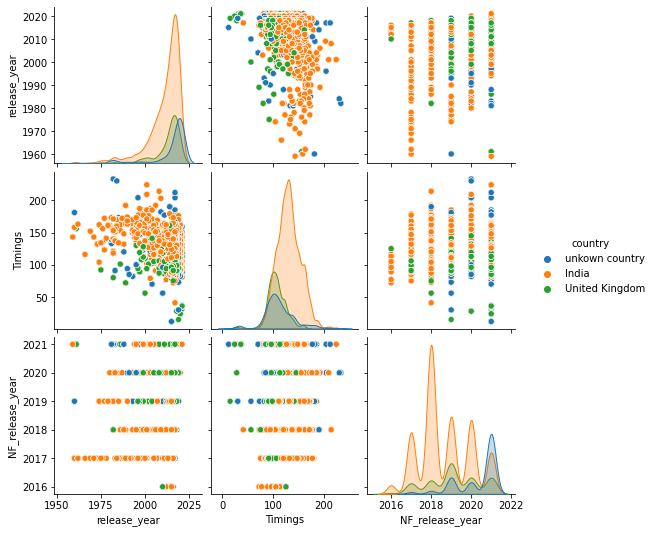

In [ ]:
sns.pairplot(data=data3,hue='country')

In [ ]:
data1.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,Timings,Readings,listed_in,NF_release_year
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,unkown cast,United States,2021-09-25,2020,PG-13,90 min,90,min,Documentaries,2021
1,s2,TV Show,Blood & Water,unkown director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,2,Seasons,International TV Shows,2021
1,s2,TV Show,Blood & Water,unkown director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,2,Seasons,TV Dramas,2021


In [ ]:
data1.reset_index(drop=True,inplace=True)

In [ ]:
data1.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,Timings,Readings,listed_in,NF_release_year
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,unkown cast,United States,2021-09-25,2020,PG-13,90 min,90,min,Documentaries,2021
1,s2,TV Show,Blood & Water,unkown director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,2,Seasons,International TV Shows,2021
2,s2,TV Show,Blood & Water,unkown director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,2,Seasons,TV Dramas,2021
3,s2,TV Show,Blood & Water,unkown director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,2,Seasons,TV Mysteries,2021
4,s2,TV Show,Blood & Water,unkown director,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2 Seasons,2,Seasons,International TV Shows,2021


**Heatmap**

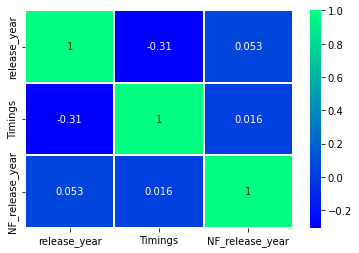

In [ ]:
sns.heatmap(data1.corr(),linewidths=1,annot=True,cmap='winter')
plt.show()

#5. Missing Value & Outlier check

In [ ]:
data1

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries
1,s2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows
...,...,...,...,...,...,...,...,...,...,...,...
8806,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,"March 2, 2019",2015,TV-14,111 min,International Movies
8806,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,"March 2, 2019",2015,TV-14,111 min,Music & Musicals
8806,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,"March 2, 2019",2015,TV-14,111 min,Dramas
8806,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,"March 2, 2019",2015,TV-14,111 min,International Movies


In [ ]:
data1['country'].fillna('unkown country',inplace=True)

In [ ]:
data1['director'].fillna('unkown director',inplace=True)

In [ ]:
data1['cast'].fillna('unkown cast',inplace=True)

In [ ]:
data1.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,unkown cast,United States,2021-09-25,2020,PG-13,90 min,Documentaries
1,s2,TV Show,Blood & Water,unkown director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows
1,s2,TV Show,Blood & Water,unkown director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Dramas
1,s2,TV Show,Blood & Water,unkown director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Mysteries
1,s2,TV Show,Blood & Water,unkown director,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows


#6. Insights based on Non-Graphical and Visual Analysis

**6.1 Comments on the range of attributes**

In [ ]:
data1.index

RangeIndex(start=0, stop=201837, step=1)

***To print the index labels of this DataFrame's index, I implemented the index property (df.index). As there are no index labels given in this programme, the index will be taken automatically from 0 to 8806 numbers, where 8806 is the number of rows, and printed on the output screen.***

In [ ]:
data1.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'Timings', 'Readings',
       'listed_in', 'NF_release_year'],
      dtype='object')

***To print the column labels of this DataFrame, I implemented column attribute as data1.columns. It will print the same because the column labels in this programme are "show id," "type," "title," "director," "cast," "country," "date added," "release year," "rating," "length," "Timings," "Readings," "listed in," and "Netflix release year."***

In [ ]:
data1.axes

[RangeIndex(start=0, stop=201837, step=1),
 Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
        'release_year', 'rating', 'duration', 'Timings', 'Readings',
        'listed_in', 'NF_release_year'],
       dtype='object')]

***In order to print both the column names and the row labels of this DataFrame, I implemented the axes property as a data1.axes.***

In [ ]:
data1.dtypes

show_id                    object
type                       object
title                      object
director                   object
cast                       object
country                    object
date_added         datetime64[ns]
release_year                int64
rating                     object
duration                   object
Timings                     int64
Readings                   object
listed_in                  object
NF_release_year             int64
dtype: object

***To print the data types of each column in this DataFrame, I implemented the "dtypes" attribute as data1.dtypes.***

In [ ]:
data1.size

2825718

***To output the entire number of pieces or items in this DataFrame, I implemented the size attribute as data1.size. The total number of elements in this data frame are 2825718.***

In [ ]:
data1.shape

(201837, 14)

***In order to output the total number of rows and columns in this DataFrame, I implemented shape property as data1.shape. There are 201837 rows and 14 columns in his DataFrame, thus it will display (201837,14).***

In [ ]:
data1.ndim

2

***To print the total number of dimensions in this DataFrame, I implemented the ndim attribute as data1.ndim. DataFrames are two-dimensional objects, therefore since we know this, it will print 2.***

In [ ]:
data1.empty


False

***To determine whether any of the DataFrames are empty or not, I implemented a "empty" attribute as data1.empty. This  prints "False" since the DataFrame is not empty.***

In [ ]:
data1.T

,0,1,2,3,4,5,6,7,8,9,...,201827,201828,201829,201830,201831,201832,201833,201834,201835,201836
show_id,s1,s2,s2,s2,s2,s2,s2,s2,s2,s2,...,s8807,s8807,s8807,s8807,s8807,s8807,s8807,s8807,s8807,s8807
type,Movie,TV Show,TV Show,TV Show,TV Show,TV Show,TV Show,TV Show,TV Show,TV Show,...,Movie,Movie,Movie,Movie,Movie,Movie,Movie,Movie,Movie,Movie
title,Dick Johnson Is Dead,Blood & Water,Blood & Water,Blood & Water,Blood & Water,Blood & Water,Blood & Water,Blood & Water,Blood & Water,Blood & Water,...,Zubaan,Zubaan,Zubaan,Zubaan,Zubaan,Zubaan,Zubaan,Zubaan,Zubaan,Zubaan
director,Kirsten Johnson,unkown director,unkown director,unkown director,unkown director,unkown director,unkown director,unkown director,unkown director,unkown director,...,Mozez Singh,Mozez Singh,Mozez Singh,Mozez Singh,Mozez Singh,Mozez Singh,Mozez Singh,Mozez Singh,Mozez Singh,Mozez Singh
cast,unkown cast,Ama Qamata,Ama Qamata,Ama Qamata,Khosi Ngema,Khosi Ngema,Khosi Ngema,Gail Mabalane,Gail Mabalane,Gail Mabalane,...,Meghna Malik,Malkeet Rauni,Malkeet Rauni,Malkeet Rauni,Anita Shabdish,Anita Shabdish,Anita Shabdish,Chittaranjan Tripathy,Chittaranjan Tripathy,Chittaranjan Tripathy
country,United States,South Africa,South Africa,South Africa,South Africa,South Africa,South Africa,South Africa,South Africa,South Africa,...,India,India,India,India,India,India,India,India,India,India
date_added,2021-09-25 00:00:00,2021-09-24 00:00:00,2021-09-24 00:00:00,2021-09-24 00:00:00,2021-09-24 00:00:00,2021-09-24 00:00:00,2021-09-24 00:00:00,2021-09-24 00:00:00,2021-09-24 00:00:00,2021-09-24 00:00:00,...,2019-03-02 00:00:00,2019-03-02 00:00:00,2019-03-02 00:00:00,2019-03-02 00:00:00,2019-03-02 00:00:00,2019-03-02 00:00:00,2019-03-02 00:00:00,2019-03-02 00:00:00,2019-03-02 00:00:00,2019-03-02 00:00:00
release_year,2020,2021,2021,2021,2021,2021,2021,2021,2021,2021,...,2015,2015,2015,2015,2015,2015,2015,2015,2015,2015
rating,PG-13,TV-MA,TV-MA,TV-MA,TV-MA,TV-MA,TV-MA,TV-MA,TV-MA,TV-MA,...,TV-14,TV-14,TV-14,TV-14,TV-14,TV-14,TV-14,TV-14,TV-14,TV-14
duration,90 min,2 Seasons,2 Seasons,2 Seasons,2 Seasons,2 Seasons,2 Seasons,2 Seasons,2 Seasons,2 Seasons,...,111 min,111 min,111 min,111 min,111 min,111 min,111 min,111 min,111 min,111 min


***In order to output this DataFrame transpose, I implemented the "T" attribute as data1.T. Transposing a DataFrame entails converting all of its rows into columns and vice versa.***

In [ ]:
data1.values

array([['s1', 'Movie', 'Dick Johnson Is Dead', ..., 'min',
        'Documentaries', 2021],
       ['s2', 'TV Show', 'Blood & Water', ..., 'Seasons',
        'International TV Shows', 2021],
       ['s2', 'TV Show', 'Blood & Water', ..., 'Seasons', ' TV Dramas',
        2021],
       ...,
       ['s8807', 'Movie', 'Zubaan', ..., 'min', 'Dramas', 2019],
       ['s8807', 'Movie', 'Zubaan', ..., 'min', ' International Movies',
        2019],
       ['s8807', 'Movie', 'Zubaan', ..., 'min', ' Music & Musicals',
        2019]], dtype=object)

***I've used the "values" attribute data1.values implementation to print the entire contents of this DataFrame as a NumPy array.***

**6.2 Comments on the distribution of the variables and relationship between them**

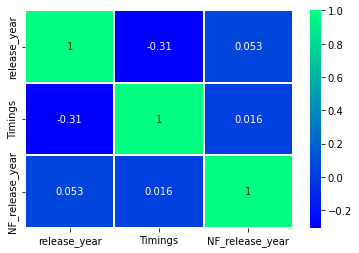

In [ ]:
sns.heatmap(data1.corr(),linewidths=1,annot=True,cmap='winter')
plt.show()

***As seen in the heatmap above, the relation between several continuous variables is weak. First, we obtain the correlation of the dataframe. Then, we receive three correlated column variables that are successively reduced to one and contain both positive and negative values.***

**6.3 Comments for each univariate and bivariate plot**

**Univariate**

**Distplot Realase Year**

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


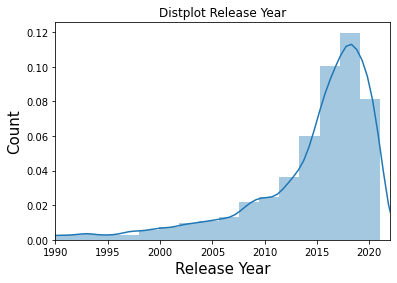

In [ ]:
sns.distplot(data1['release_year'])
plt.xlim(1990,2022)
plt.xlabel('Release Year',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.title('Distplot Release Year')
plt.show()

***In the above plot it show the count of movie relase a year***

**Univariate Distribution Year**



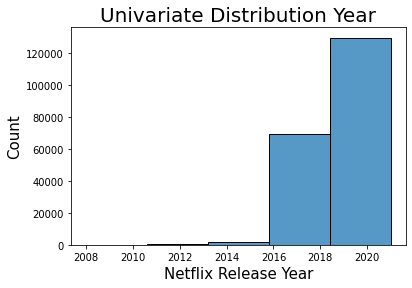

In [ ]:
sns.histplot(data1['NF_release_year'],bins=5)
plt.xlabel('Netflix Release Year',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.title('Univariate Distribution Year',fontsize=20)
plt.show()

***In the above Netflix TV shows/Movies release from 2010 to 2020***

***Most of the Movies/TV shows release from 2018 to 2020 its a high number of count as compare to previous year***

**Univariate Release Type**

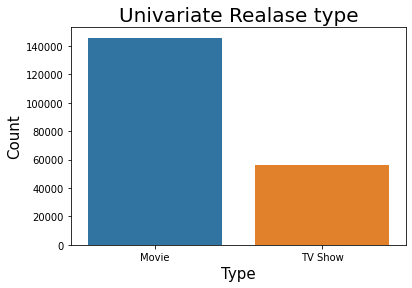

In [ ]:
sns.countplot(data=data1,x='type')
plt.xlabel('Type',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.title('Univariate Realase type',fontsize=20)
plt.show()

***In the above plot show type of TV show and Movie***

***Pepole likes to watching movies as compare to TV show***

**Bivarient**

**Old Movies**


In [ ]:
old=data[data["release_year"]<1955]
old_values=old[old["type"]=="Movie"][["title","release_year"]].sort_values("release_year",ascending=True)
old_values.reset_index(drop=True)
old_values


,title,release_year
7790,Prelude to War,1942
8205,The Battle of Midway,1942
8660,Undercover: How to Operate Behind Enemy Lines,1943
8739,Why We Fight: The Battle of Russia,1943
8763,WWII: Report from the Aleutians,1943
8419,The Memphis Belle: A Story of a\nFlying Fortress,1944
8436,The Negro Soldier,1944
8640,Tunisian Victory,1944
7219,Know Your Enemy - Japan,1945
7575,Nazi Concentration Camps,1945


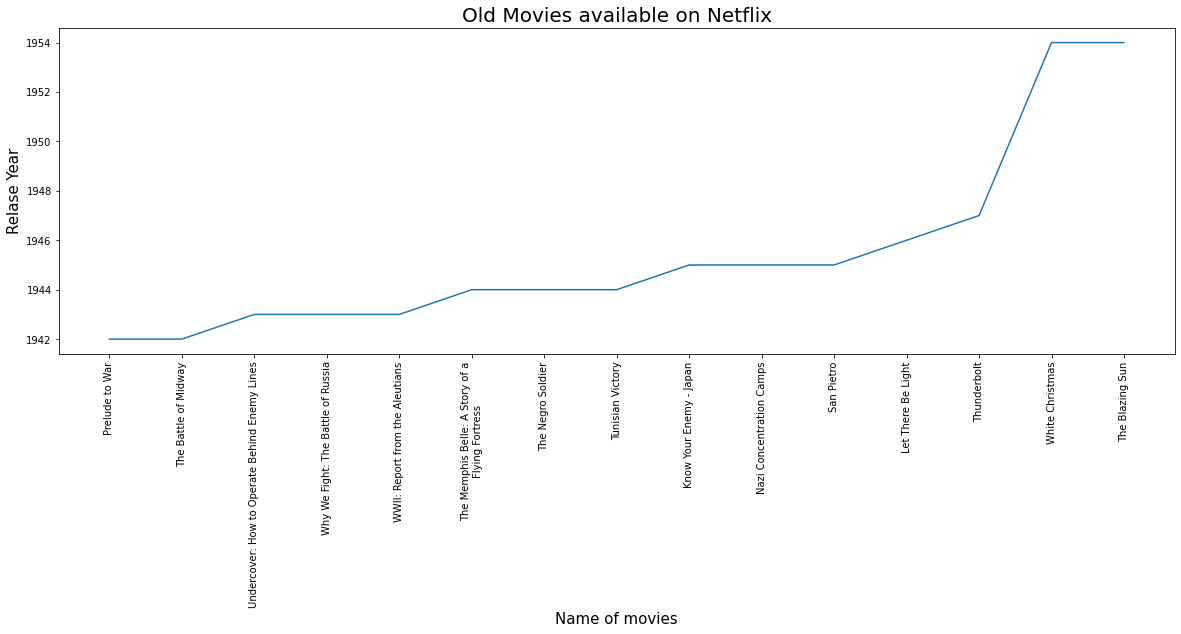

In [ ]:
plt.figure(figsize=(20,6))
sns.lineplot(data=old_values,x='title',y='release_year')
plt.xlabel("Name of movies",fontsize=15)
plt.ylabel("Relase Year",fontsize=15)
plt.title("Old Movies available on Netflix",fontsize=20)
plt.xticks(rotation=90)
plt.show()

***In the above plot shows old movies from 1942 to 1954***

***It also show the count of each year of movie***


**Top 10 Director**

In [ ]:
dir= data["director"].value_counts().sort_values(ascending=False)[0:10]
dir=dir.reset_index()
dir

,index,director
0,Rajiv Chilaka,19
1,"Raúl Campos, Jan Suter",18
2,Marcus Raboy,16
3,Suhas Kadav,16
4,Jay Karas,14
5,Cathy Garcia-Molina,13
6,Youssef Chahine,12
7,Jay Chapman,12
8,Martin Scorsese,12
9,Steven Spielberg,11


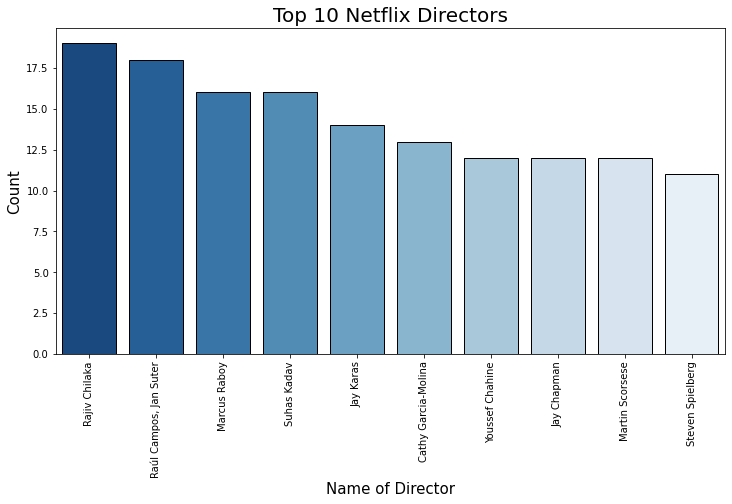

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(data=dir, x=dir["index"],y=dir["director"],edgecolor="black",palette="Blues_r")
plt.xticks(rotation=90)
plt.xlabel("Name of Director",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.title("Top 10 Netflix Directors",fontsize=20);

***In the above plot show top 10 directer list***

***In that list dark blue plot means release most movies and light blue means relese less no movies as compare to previous director***

**Top 10 cast**

In [ ]:
data4= data1.copy()
data4.drop_duplicates(subset="title")
cast_director= data4["cast"].value_counts().sort_values(ascending=False)[1:11]
cast_director=cast_director.reset_index()
cast_director

,index,cast
0,Alfred Molina,160
1,Salma Hayek,130
2,Frank Langella,128
3,John Rhys-Davies,125
4,John Krasinski,121
5,Liam Neeson,120
6,Anupam Kher,116
7,David Attenborough,103
8,Quvenzhané Wallis,100
9,James Faulkner,93


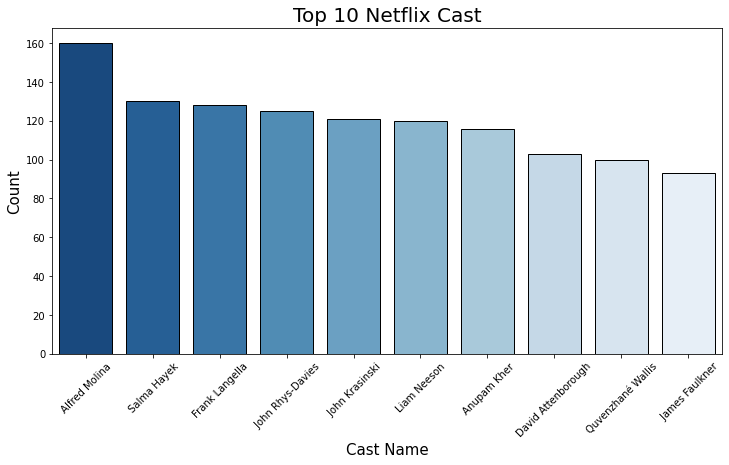

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(data=cast_director, x="index",y="cast",edgecolor="black",palette="Blues_r")
plt.xticks(rotation=45)
plt.xlabel("Cast Name",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.title("Top 10 Netflix Cast",fontsize=20);


***In the plot show Top 10 cast name most in this cast is belongs to diffirent country***

**Old TV show**

In [ ]:
old_tv=data4[data4["release_year"]<1990]
old_tv_values=old_tv[old_tv["type"]=="TV Show"][["title","release_year"]].sort_values("release_year",ascending=True)
old_tv_values.reset_index(drop=True,inplace=True)
old_tv_values


,title,release_year
0,Pioneers: First Women Filmmakers*,1925
1,Five Came Back: The Reference Films,1945
2,Pioneers of African-American Cinema,1946
3,Pioneers of African-American Cinema,1946
4,Pioneers of African-American Cinema,1946
...,...,...
247,The Super Mario Bros. Super Show!,1989
248,The Super Mario Bros. Super Show!,1989
249,The Super Mario Bros. Super Show!,1989
250,The Super Mario Bros. Super Show!,1989


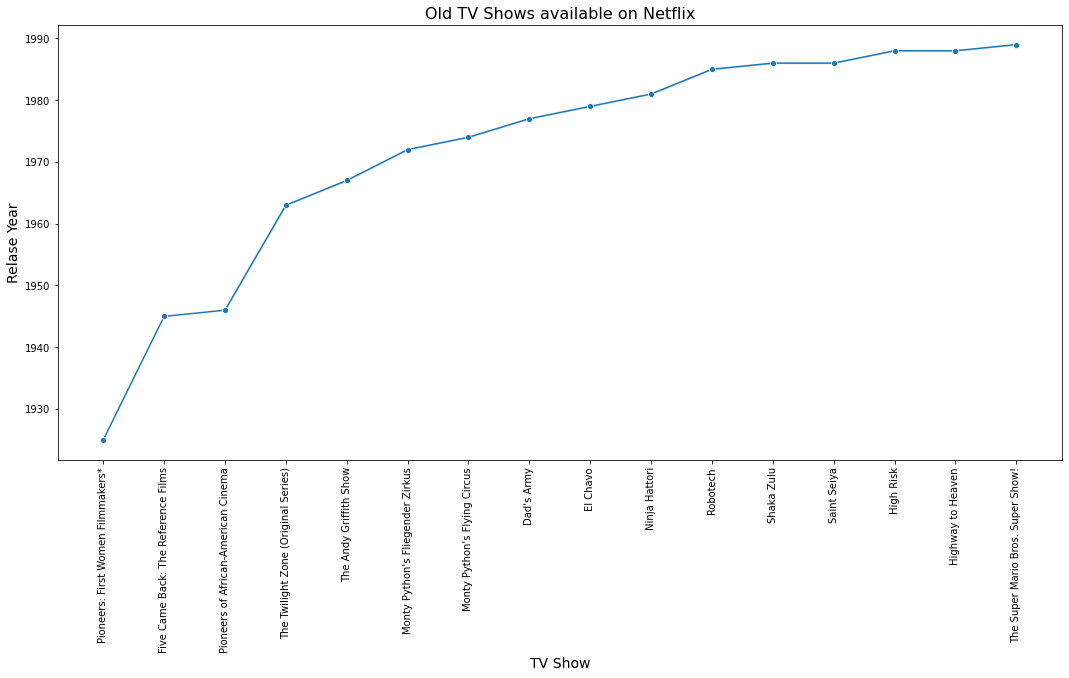

In [ ]:
plt.figure(figsize=(18,8))
sns.lineplot(data=old_tv_values,x="title",y="release_year",marker="o")
plt.xlabel("TV Show",fontsize=14)
plt.ylabel("Relase Year",fontsize=14)
plt.title("Old TV Shows available on Netflix",fontsize=16)
plt.xticks(rotation=90);

***In the above plot show oldest Tv show and release year less than 1990***


**Top 10 United States actor**

In [ ]:
cast_us= data4[data4["country"]=="United States"]
cast_us= cast_us["cast"].value_counts().sort_values(ascending=False)[1:12]
cast_us=cast_us.reset_index()
cast_us


,index,cast
0,Alfred Molina,44
1,Luci Christian,40
2,Fred Tatasciore,40
3,James Faulkner,39
4,James Franco,38
5,Lin Shaye,37
6,John Swasey,36
7,Andy McAvin,36
8,Patrick Warburton,36
9,Salma Hayek,36


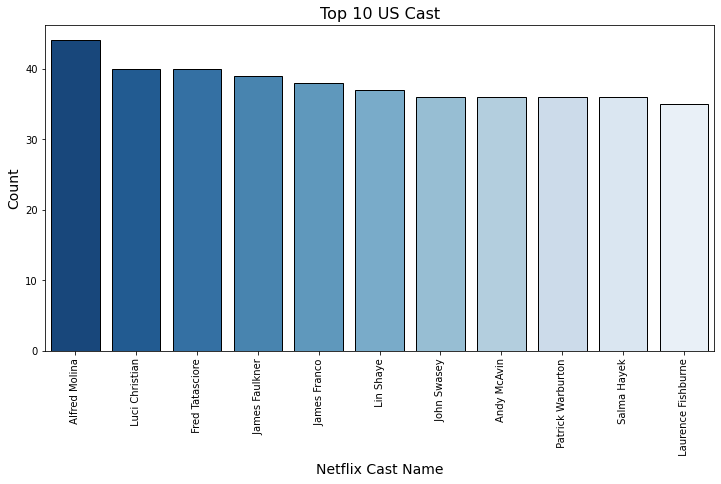

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(data=cast_us, x="index",y="cast",edgecolor="black",palette="Blues_r")
plt.xticks(rotation=90)
plt.xlabel("Netflix Cast Name",fontsize=14)
plt.ylabel("Count",fontsize=14)
plt.title("Top 10 US Cast",fontsize=16);


**Outlier check**

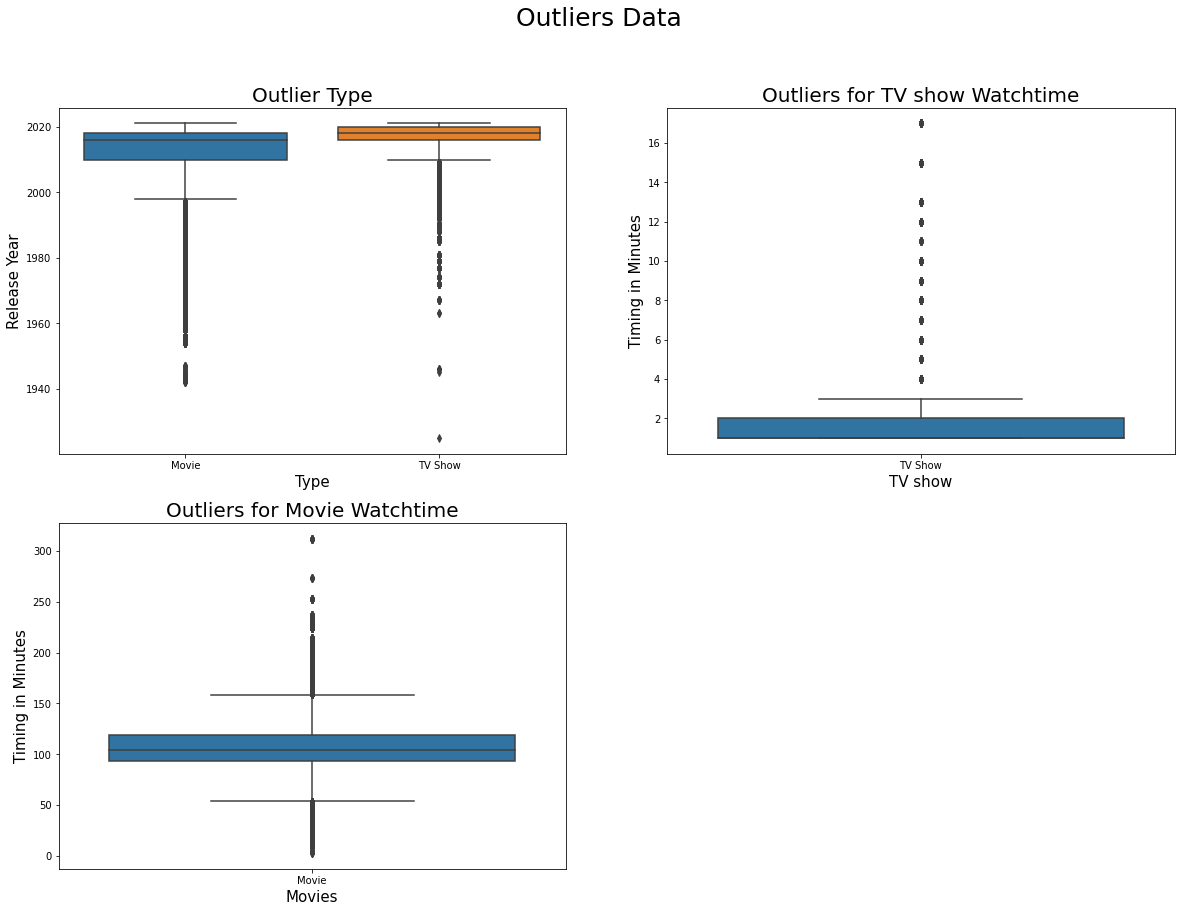

In [ ]:
plt.figure(figsize=(20,14))
plt.subplot(2, 2, 1)
sns.boxplot(data=data1, x="type",y="release_year")
plt.xlabel("Type",fontsize=15)
plt.ylabel("Release Year",fontsize=15)
plt.title("Outlier Type",fontsize=20)

plt.subplot(2, 2, 2)
sns.boxplot(data=data1[data1["type"]=="TV Show"],x="type",y="Timings")
plt.xlabel("TV show",fontsize=15)
plt.ylabel("Timing in Minutes",fontsize=15)
plt.title("Outliers for TV show Watchtime",fontsize=20)

plt.subplot(2, 2, 3)
sns.boxplot(data=data1[data1["type"]=="Movie"],x="type",y="Timings")
plt.xlabel("Movies",fontsize=15)
plt.ylabel("Timing in Minutes",fontsize=15)
plt.title("Outliers for Movie Watchtime",fontsize=20)
plt.suptitle("Outliers Data",fontsize=25)
plt.show()


***In the above plot1 it show release year 1940 to 2020 but in this the outlier is below almost 2010***

***In plot2 it show TV show oulier most of the people whatch Tv show less tha 2 mins***

***In plot3 it show Movie otlier and most of the people watch movies almost 100 min***

**7. Business Insights  - Should include patterns observed in the data along with what you can infer from it**

In [ ]:
data5=data1.copy()

In [ ]:
data5=data5.drop_duplicates(subset='title')

In [ ]:
data5.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,Timings,Readings,listed_in,NF_release_year
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,unkown cast,United States,2021-09-25,2020,PG-13,90 min,90,min,Documentaries,2021
1,s2,TV Show,Blood & Water,unkown director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,2,Seasons,International TV Shows,2021


In [ ]:
US_ratings=data5[data5["country"]=="United States"]
US_ratings=US_ratings["rating"].value_counts().sort_values(ascending=False)[0:5]
US_ratings


TV-MA    985
R        536
TV-14    437
PG-13    362
TV-PG    272
Name: rating, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


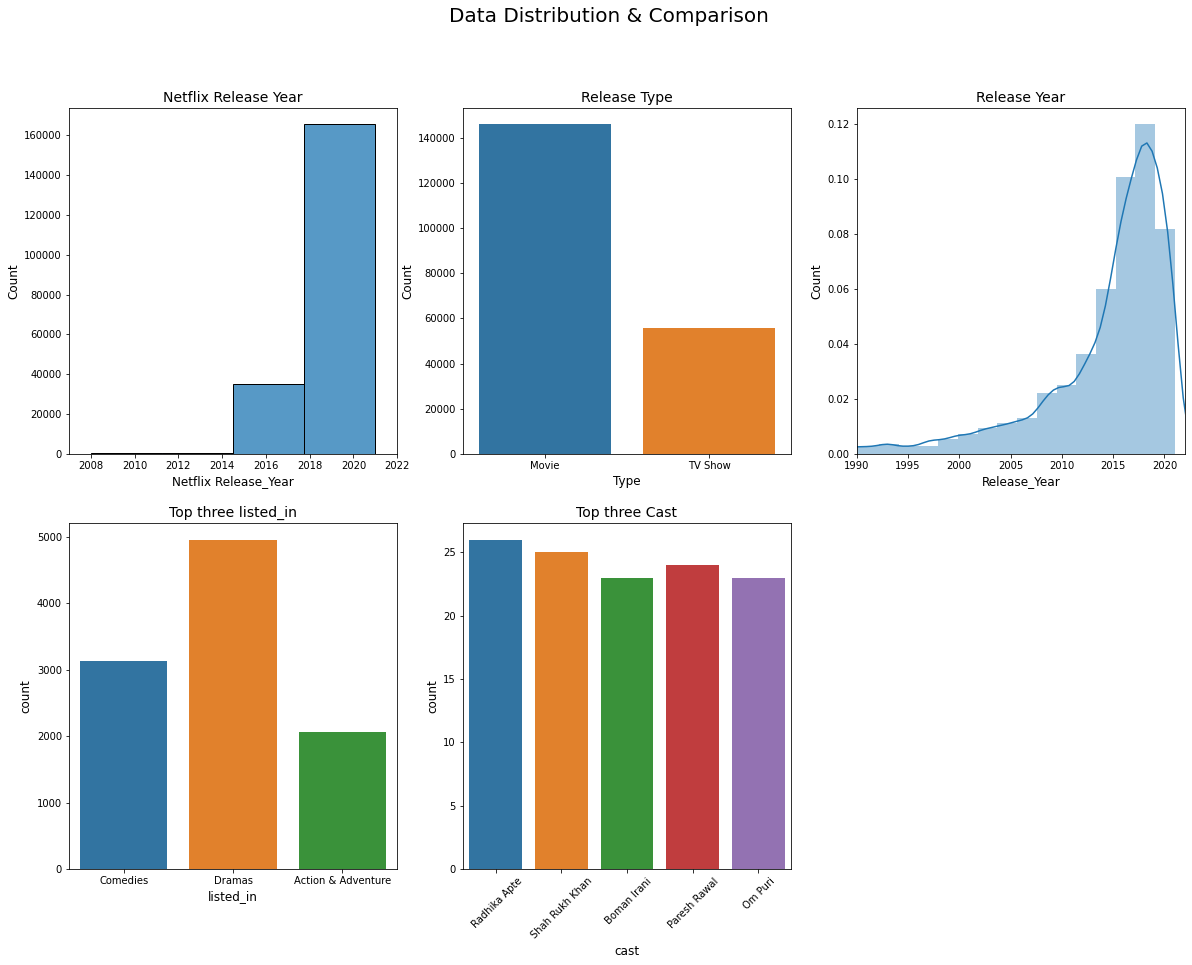

In [ ]:
plt.figure(figsize=(20,14))
plt.subplot(2,3, 1)
sns.histplot(data1["NF_release_year"],bins=4)
plt.xlim(2007,2022)
plt.xlabel("Netflix Release_Year",fontsize=12)
plt.ylabel("Count",fontsize=12)
plt.title("Netflix Release Year",fontsize=14)

plt.subplot(2,3,2)
sns.countplot(data=data1,x="type")
plt.xlabel("Type",fontsize=12)
plt.ylabel("Count",fontsize=12)
plt.title("Release Type",fontsize=14)

plt.subplot(2,3,3)
sns.distplot(data1["release_year"])
plt.xlim(1990,2022)
plt.xlabel("Release_Year",fontsize=12)
plt.ylabel("Count",fontsize=12)
plt.title("Release Year",fontsize=14)

plt.subplot(2,3,4)
sns.countplot(data=data3,x="listed_in")
plt.title("Top three listed_in",fontsize=14)
plt.xlabel("listed_in",fontsize=12)
plt.ylabel("count",fontsize=12)

casts= data3["cast"].value_counts().index[1:6]
casts_data= data3[data3["cast"].isin(casts)]

plt.subplot(2,3,5)
sns.countplot(data=casts_data,x="cast")
plt.title("Top three Cast",fontsize=14)
plt.xticks(rotation=45)
plt.xlabel("cast",fontsize=12)
plt.ylabel("count",fontsize=12)
plt.suptitle("Data Distribution & Comparison",fontsize=20)

plt.show()

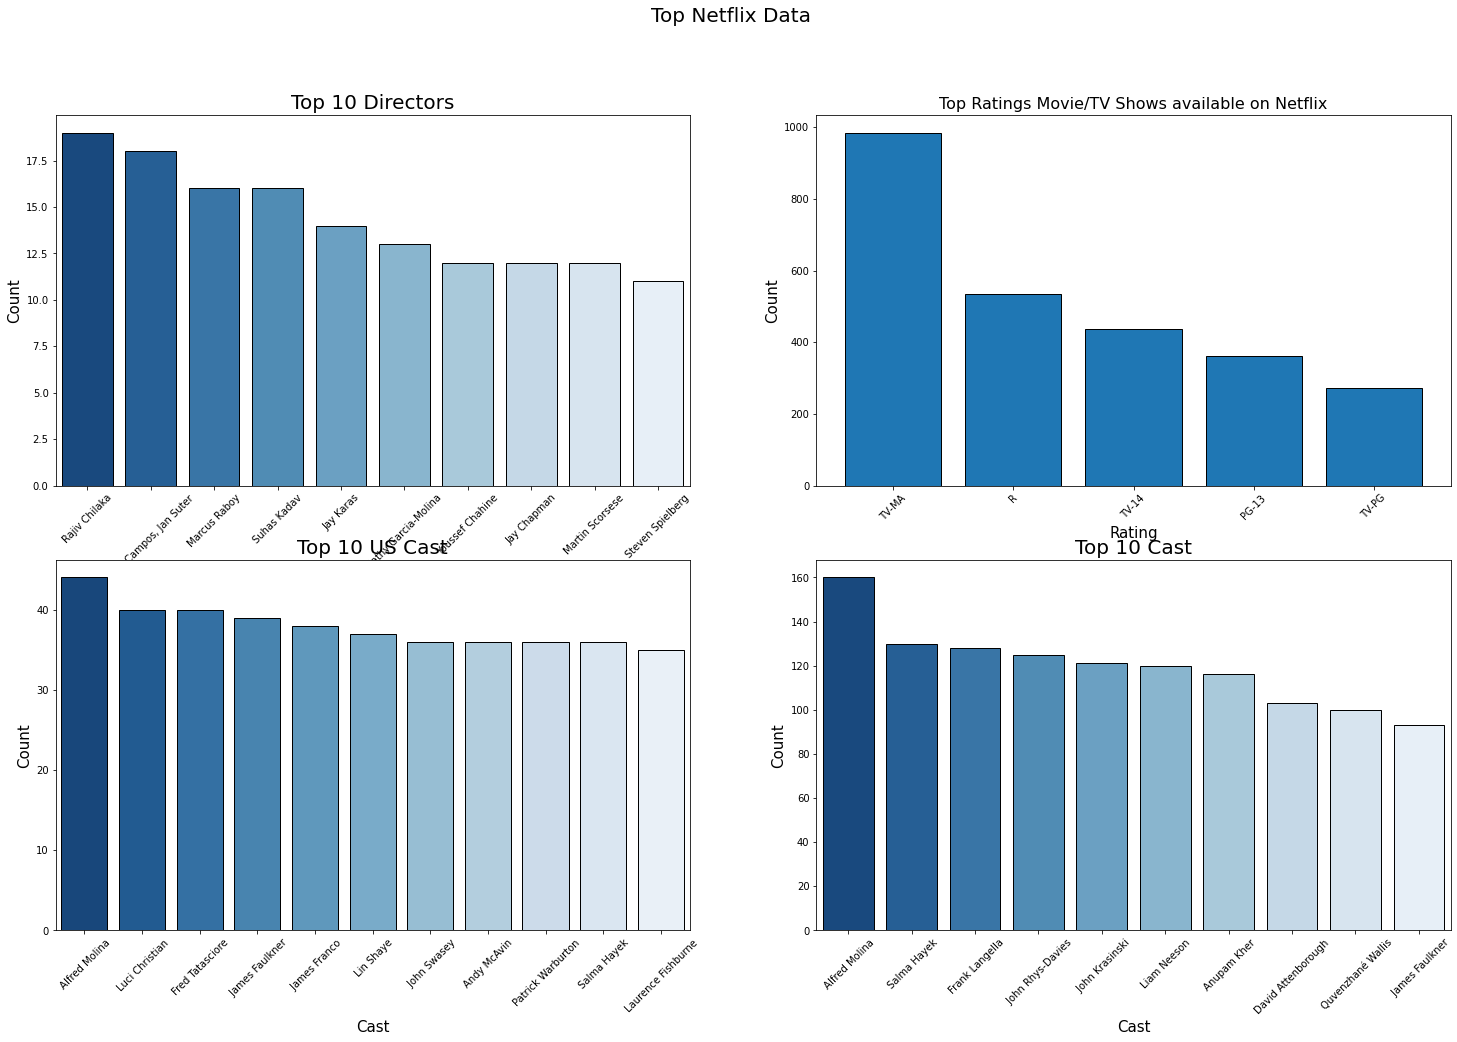

In [ ]:
plt.figure(figsize=(25,15))
plt.subplot(2,2,1)
sns.barplot(data=dir, x=dir["index"],y=dir["director"],edgecolor="black",palette="Blues_r")
plt.xticks(rotation=45)
plt.xlabel("Director",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.title("Top 10 Directors",fontsize=20)

plt.subplot(2,2,2)
plt.bar(US_ratings.index,US_ratings.values,edgecolor="black")
plt.xticks(rotation=45)
plt.xlabel("Rating",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.title("Top Ratings Movie/TV Shows available on Netflix",fontsize=16)


plt.subplot(2,2,3)
sns.barplot(data=cast_us, x="index",y="cast",edgecolor="black",palette="Blues_r")
plt.xticks(rotation=45)
plt.xlabel("Cast",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.title("Top 10 US Cast",fontsize=20)

plt.subplot(2,2,4)
sns.barplot(data=cast_director, x="index",y="cast",edgecolor="black",palette="Blues_r")
plt.xticks(rotation=45)
plt.xlabel("Cast",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.title("Top 10 Cast",fontsize=20)

plt.suptitle("Top Netflix Data",fontsize=20)

plt.show()

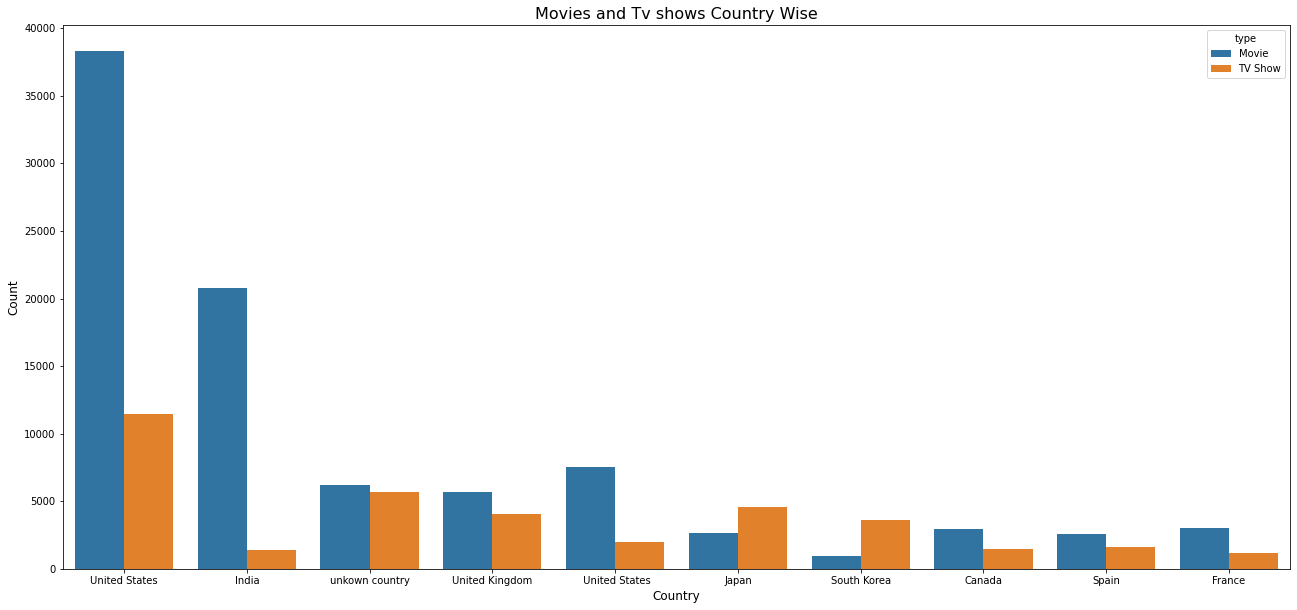

In [ ]:
plt.figure(figsize=(22,10))
sns.countplot(data=data4,x=data4['country'],hue=data4['type'],order=data4['country'].value_counts().index[0:10])
plt.xlabel("Country",fontsize=12)
plt.ylabel("Count",fontsize=12)
plt.title("Movies and Tv shows Country Wise",fontsize=16);

In [ ]:
latest_years= data4[data4["NF_release_year"]>2020]
new_values= latest_years["type"].value_counts()

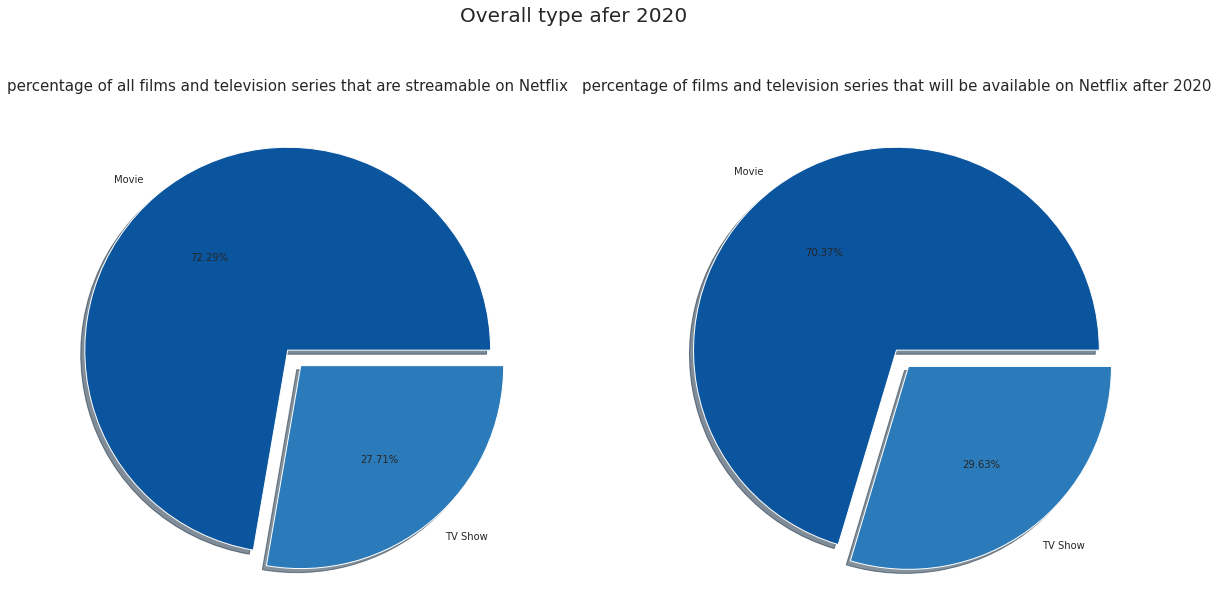

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
color=sns.color_palette("Blues_r")
sns.set_style("white")
plt.pie(value,labels=value.index,autopct="%0.2f%%",explode=[0,0.1],shadow=True,colors=color)
plt.title("percentage of all films and television series that are streamable on Netflix",fontsize=15)

plt.subplot(1,2,2)
color=sns.color_palette("Blues_r")
sns.set_style("white")
plt.pie(new_values,labels=new_values.index,autopct="%0.2f%%",explode=[0,0.1],shadow=True,colors=color)
plt.title("percentage of films and television series that will be available on Netflix after 2020",fontsize=15)

plt.suptitle("Overall type afer 2020",fontsize="20")
plt.show()


**Business Insights**

***a. We can see that the majority of movies are released in the US and India.***

***b. The movie distribution where Netflix has released the movies/TV Shows is shown in the plot "Distribution of Netflix Release Year." Since 2020, Netflix has dramatically boosted the number of movies and TV shows it releases.***

***c. Netflix typically releases more TV shows between December and the middle of the year***

***d. Plot The genre of movies/TV shows that were purchased/produced over the years is seen in "Top three listed_in," which is Dramas, comedies, and Action & Adventure are what Netflix concentrates on most.***

***e. The majority of Indian programming is TV-14 rated.***

***f. More films and TV series are being launched in 2019***

***g. Many films and television episodes produced by "Alfred, Salma, and Frank" have been published by Netflix, demonstrating the company's commitment to producing content that caters to its consumers' interests.***

***h. Due to the brief duration of the movies, Netflix mostly releases them on its platform.***


**8. Recommendations**

***1.release animated films and TV programmes holiday season because a lot of kids are watching cartoons during that time.***

***2.There are many Third-Party competitors in this industry, thus they develop various novel initiatives that fail to compete.***

***3.In India, there are numerous holiday seasons, and because most people vacation and participate in extracurricular activities during these times, new, well-liked movies are released around these times.***

***4.Create something new  additional customers from other countries as compare as more than 50% of the population in North America is a Netflix subscriber and they are mostly active.***

***5.Providing a personal rating for a film or television programme***